<a href="https://colab.research.google.com/github/tjdudgml3/ms_aischool/blob/main/%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 검정(Testing)

어떤 가설이 맞는지 아닌지 확인하는 작업   
어떤 확률 분포가 있을 때 어떤 가설을 H라 하고 이를 증명하는 것이 통계적 가설검정

## 가설
### 귀무가설
      확률분포의 모수에 대한 가설
      변화가 없다.
      예를 들어 귀무가설 정규분포의 모수가 0 예측 -> 실제 모수값이 0인가?
      신약의 효과가 없다.
$$H_0:θ = θ_0$$
### 대립가설
      어떤 것과 차이가 난다.
      효과가 있다.
      귀무가설이 거짓이라면 대안적으로 참이 되는 가설
      예를 들면 신약의 효과 있다.
      정규분포의 평균이 μ가 아니다.
$$H_0:θ = θ_0,\quad H_a:θ \neq θ_0$$

## 검정 통계량
어떤 가설을 채택 혹은 기각을 하기 위해 기준이 되는 값
$$t=f(x1,x2,⋯,x_N)$$

### 베르누이 분포 확률 변수
$$t = Σx~Bin(t;N,μ)$$

### 분산 σ^2 값이 정해지고 알고 있는 정규분포 확률 변수

$$z = \frac{\bar{x}-μ}{\frac{s}{\sqrt{N}}}$$


## 유의 확률
### p-value
표본 데이터가 해당 확률분포에서 나오기 쉬운 값인지 아닌지를 알 수 있는 수치   
표본 추출하고, 그 표본으로 부터 얻은 정보를 기초로 해서 귀무가설이 참인지 거짓인지 판정(오류가 날 가능성),귀무가설이 참이라고 가정했을 때 표본으로 얻어지는 통계치가 나타날 확률을 계산

이 확률 값이 p-value라고 한다.

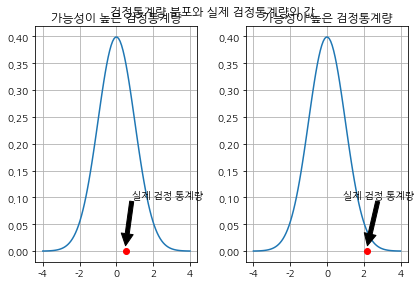

In [ ]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')
xx1 = np.linspace(-4,4,100)

plt.subplot(121)
plt.grid()
plt.title('가능성이 높은 검정통계량')
plt.plot(xx1, scipy.stats.norm().pdf(xx1))
plt.plot(0.5, 0, 'ro')
plt.annotate('실제 검정 통계량', xy=(0.5,0.01),xytext=(0.85,0.1), arrowprops={'facecolor':'black'})

plt.subplot(122)
plt.title('가능성이 높은 검정통계량')
plt.plot(xx1, scipy.stats.norm().pdf(xx1))
plt.plot(2.2, 0, 'ro')
plt.annotate('실제 검정 통계량', xy=(2.2,0.01),xytext=(0.85,0.1), arrowprops={'facecolor':'black'})

plt.suptitle('검정통계량 분포와 실제 검정통계량의 값')
plt.tight_layout()
plt.grid()
plt.show()



### 유의 수준
유의 수준 유의 확율(알파)이 유의수준을 기준으로 귀무가설 채택 여부를 결정

유의 수준이 유의 확률보다 작으면 귀무가설을 기각하고, 대립가설을 채택


### 검정 방법

1. 데이터가 어떤 확률분포를 가지는 확률 변수라 가정
2. 해당하는 확률분포의 모수가 특정한 값을 가진다고 가정
3. 검정 통계량을 계산하는 식에 대입한 결과에 따라 검정통계량을 구함
4. 귀무가설이 어떤 유의 확율을 가지고 있는지 확인
5. 미리 정해둔 유의 수준보다 작은지 큰지 확인
6. 유의확률이 유의수준보다 크면 귀무가설을 채택, 작으면 대립가설 채택


### 이항검정
이항분포를 이용해 베르누이 확률변수의 모수 μ(1이 나올 확률)가 특정값인지에 대한 귀무가설 검정


In [ ]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = scipy.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [ ]:
## 유의 수준 0.05, 0.01
scipy.stats.binom_test(n, N, 0.5)

0.34375

In [ ]:
# 데이터의 개수가 100개 일 때
N =100
mu_0 = 0.5
np.random.seed(0)
x = scipy.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [ ]:
sp.stats.binom_test(n, N, 0.5)
# 유의 확률이 0.92로 높은 값을 가지고 있으므로 귀무가설을 기각할 수 없다.
# 따라서 u가 0.5다.

0.9204107626128215

In [ ]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [ ]:
scipy.stats.binom_test(n,N,0.5)
# 유의 확률이 0.05보다 낮으므로 귀무가설을 채택할 수 없다. 
# 따라서 모수값은 0.5가 아니다.

0.00018314322488235366

### 카이제곱검정
카테고리의 분포의 모수에 대해서 검정

In [ ]:
N = 10
K = 4
mu_0 = np.ones(K)/K
# mu = (0.25, 0.25, 0.25, 0.25)
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [ ]:
# 귀무가설 : mu=(0.25, 0.25, 0.25, 0.25)
scipy.stats.chisquare(n)
# 유의 수준 0.05 보다 높은 0.157의 값이기 때문에 mu=(0.25, 0.25, 0.25, 0.25)
# 검정을 실시하기 전에 유의 수준을 설정하는데 보통 0.05, 0.01 정합니다.
# 유의수준은 해당 표본집단이 어떤 모수(0.25,0.25,0.25,0.25) -> 모집단에서 해당 표본집단이 나올 확율

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [ ]:
N = 100
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([28, 23, 29, 20])

In [ ]:
scipy.stats.chisquare(n)

Power_divergenceResult(statistic=2.16, pvalue=0.5398700347618)

In [ ]:
N = 100
K = 4
mu_0 = [0.35, 0.3, 0.2, 0.15]
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [ ]:
scipy.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

### 단일표본 z검정
$σ^2$의 값이 알고 있을 경우 정규분포 표본에 대한 모수를 조사하는 방법


In [ ]:
# 모수 u=0, sigma2=1
N = 10
mu_0 = 0
np.random.seed(0)
x = scipy.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [ ]:
def ztest_1samp(x, sigma2=1, mu=0):
  z = (x.mean()-mu)/np.sqrt(sigma2/len(x))
  return z, 2 * scipy.stats.norm().sf(np.abs(z))

ztest_1samp(x, mu=0)

(2.3338341854824276, 0.019604406021683538)

- 1종오류(Type 1 Error)
      위 실습 코드처럼 귀무가설이 진실임에도 귀무가설이 유의수준보다 작아서 귀무가설이 채택되지 못하는 경우
      보통 데이터의 수가 부족해서 나타나는 경우가 많음(N(표본의 개수) >= 30)

In [ ]:
N = 100
mu_0 = 0
np.random.seed(0)
x = scipy.stats.norm(mu_0).rvs(N)
ztest_1samp(x, mu=0)

(-1.4311427506901984, 0.15238930713193566)

### 단일 표본 t 검정
정규분포의 표본에 대해 기댓값을 조사하는 검정방법
$$\frac{\bar{x}-μ_0}{\frac{s}{\sqrt{N}}}$$

In [ ]:
N = 10
mu_0 = 0
np.random.seed(0)
x = scipy.stats.norm(mu_0).rvs(N)
# 단일 표본 t검정
# popmean : 귀무가설의 기댓값
scipy.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

In [ ]:
N = 100
mu_0 = 0
np.random.seed(0)
x = scipy.stats.norm(mu_0).rvs(N)
# 단일 표본 t검정
# popmean : 귀무가설의 기댓값
scipy.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

### 독립표본 t검정
두 개의 독립적인 정규분포의 데이터 셋을 사용해 두 정규분포의 기댓값이 동일한지 확인하는 검사
- 두 개의 표본의 분산이 같을 경우
$$ t = \frac{\bar{x_1} - \bar{x_2}}{s⋅\sqrt{\frac{1}{N_1}+\frac{1}{N_2}}}$$
- 두개의 표본이 분산 같지 않을 경우
$$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s^2}{N_1}+\frac{s^2}{N_2}}}$$


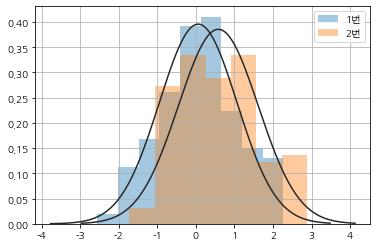

In [ ]:
import seaborn as sns
N_1 = 100
mu_1 = 0
sigma_1 = 1
N_2 = 100
mu_2 = 0.5
sigma_2 = 1

np.random.seed(0)
x1 = scipy.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = scipy.stats.norm(mu_2, sigma_2).rvs(N_2)

ax = sns.distplot(x1, kde=False, fit=scipy.stats.norm, label='1번')
ax = sns.distplot(x2, kde=False, fit=scipy.stats.norm, label='2번')
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.mean(x1), np.mean(x2)

(0.059808015534485, 0.5820129707478374)

In [ ]:
# 귀무가설이 u0 = u1
scipy.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-3.597192759749613, pvalue=0.00040634222594880895)

- 2종오류
      Type 2 Error(2종 오류)
      귀무가설이 거짓이지만, 귀무가설이 참으로 나오는 오류
      데이가 많아지면 해당 오류의 확률을 줄일 수 있다.

### 대응표본 t 검정
두 집단의 표본이 1대 1 대응하는 경우 해당 검정을 시행할 수 있다.   
예시) 학생들의 자습을 동일한 시간 했을 때 자습을 하기 전의 성적과 하고 나서의 성적이 1대 1 매칭이 될 때 자습에 대한 영향력을 검정하는 방법

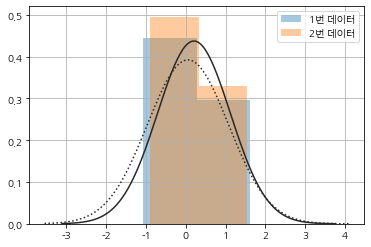

In [ ]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = scipy.stats.norm(mu_1).rvs(N)
x2 = x1 + scipy.stats.norm(mu_2).rvs(N)

ax = sns.distplot(x1,kde=False, fit = scipy.stats.norm, label = '1번 데이터')
ax = sns.distplot(x2,kde=False, fit = scipy.stats.norm, label = '2번 데이터')
ax.lines[0].set_linestyle(':')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 귀무가설 x1, x2의 변화가 있다.
scipy.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-0.22700222832126432, pvalue=0.8315516654768336)

### 등분산 검정
두 개의 정규분포에서 생성된 데이터들의 분산 모수가 같은지 확인하는 검정
- bartlett 검정
- fligner 검정
- levene 검정

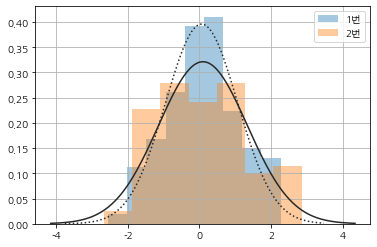

In [ ]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2

np.random.seed(0)
x1 = scipy.stats.norm(0, sigma_1).rvs(N1)
x2 = scipy.stats.norm(0, sigma_2).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=scipy.stats.norm, label='1번')
ax = sns.distplot(x2, kde=False, fit=scipy.stats.norm, label='2번')

ax.lines[0].set_linestyle(':')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

In [ ]:
# 귀무가설 : x1과 x2의 분산이 같다.
scipy.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [ ]:
scipy.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [ ]:
scipy.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

### 정규성 검정
확률분포가 가우시안 정규분포를 따르는지 확인하는 검정
- 콜모고로프-스미르노프 검정
- 샤피로-월크 검정
- 앤더스-달링 검정

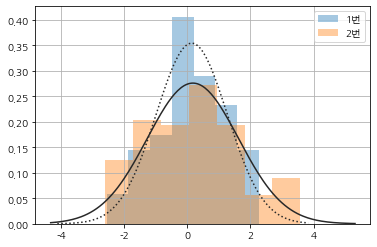

In [ ]:
np.random.seed(0)
N1 = 50
N2 = 100

x1 = scipy.stats.norm(0,1).rvs(N1)
x2 = scipy.stats.norm(0,1.5).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=scipy.stats.norm, label='1번')
ax = sns.distplot(x2, kde=False, fit=scipy.stats.norm, label='2번')

ax.lines[0].set_linestyle(':')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 콜모고로프-스미르노프 검정
scipy.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.13, pvalue=0.613749001553477)

In [ ]:
# 샤피로-월크 검정
scipy.stats.shapiro(x1), scipy.stats.shapiro(x2)

(ShapiroResult(statistic=0.987645149230957, pvalue=0.8765420317649841),
 ShapiroResult(statistic=0.9792247414588928, pvalue=0.1156543642282486))

In [ ]:
# 앤더스-달링 검정
scipy.stats.anderson(x1)

AndersonResult(statistic=0.15006999533388665, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))